# 1. k-Means clustering algorithm


> import dataset




In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd

#와인 데이터 불러오기
#return_X_y를 true로 설정하면 (X,y)를 리턴합니다.
x, y = load_wine(return_X_y=True)

#사이킷런의 와인 데이터셋은 크기가 크지 않습니다. 따라서 데이터셋의 약 33%를 테스트셋으로 사용합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1230)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



와인 데이터는 13차원이기 때문에 차원 축소 없이 시각화가 불가능합니다. PCA를 이용하여 와인 데이터를 2차원으로 차원 축소합니다.


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_train_scaled)

_x_train = pca.transform(x_train_scaled)
_x_test = pca.transform(x_test_scaled)




> visualization



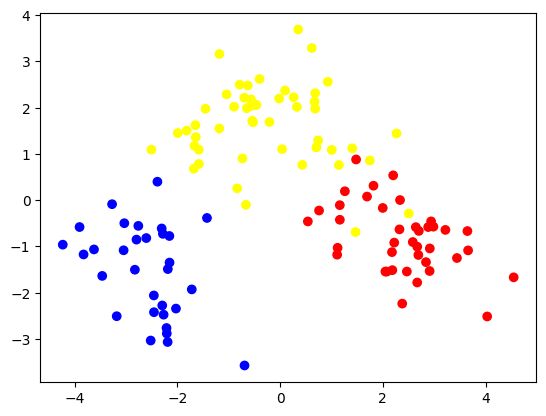

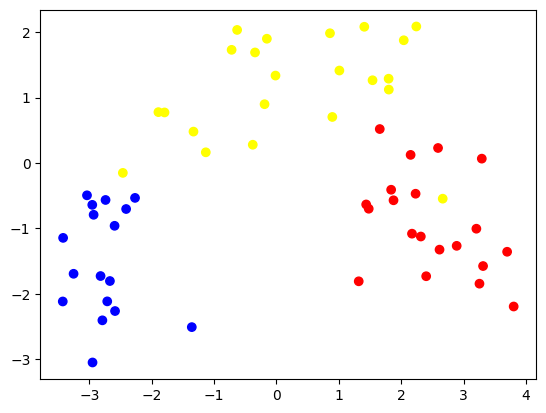

In [3]:
import matplotlib.pyplot as plt

#시각화를 위한 컬러 라벨링
color_dictionary = {0: 'red', 1: 'yellow', 2:'blue'}

y_train_color = [color_dictionary[y_train[i]] for i in range(len(y_train))]
y_test_color = [color_dictionary[y_test[i]] for i in range(len(y_test))]

#훈련 세트 시각화

plt.scatter(_x_train[:, 0], _x_train[:, 1], color = y_train_color)
plt.show()

#평가 세트 시각화

plt.scatter(_x_test[:, 0], _x_test[:, 1], color = y_test_color)
plt.show()



> Model define


In [6]:
from sklearn.cluster import KMeans

#k-Means 선언 및 학습
#와인 데이터셋은 총 3가지 클래스로 구성되어 있으므로, n_clusters를 3으로 설정하였습니다.

km = KMeans(n_clusters = 3, max_iter=300)

#x_train_scaled 데이터에 대하여 k-Means 모델 학습
km.fit(x_train_scaled)

#x_train_scaled 데이터 및 x_test_scaled 데이터 예측
y_train_predict = km.predict(x_train_scaled)
y_test_predict = km.predict(x_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




> visualization


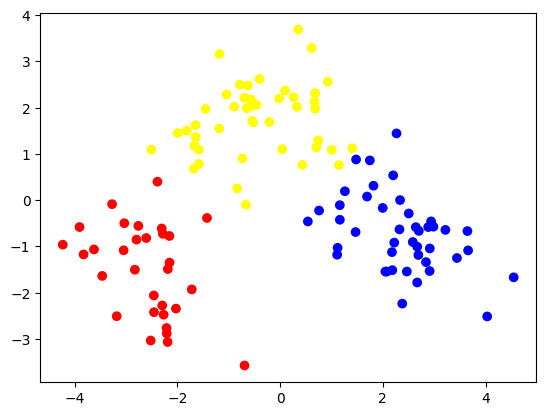

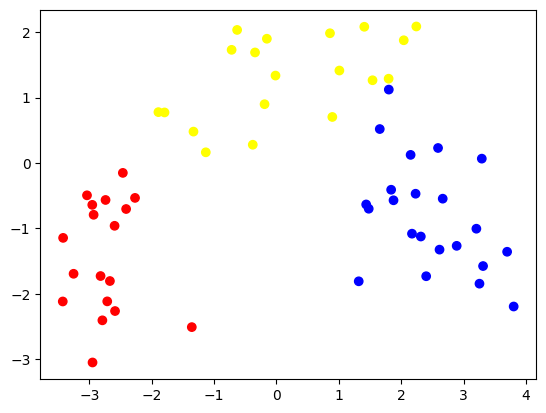

In [7]:
#시각화를 위한 컬러 라벨링
y_train_color_predict = [color_dictionary[y_train_predict[i]] for i in range(len(y_train_predict))]
y_test_color_predict = [color_dictionary[y_test_predict[i]] for i in range(len(y_test))]

#k-Means를 적용한 훈련 세트 시각화
plt.scatter(_x_train[:,0],_x_train[:,1], color = y_train_color_predict)
plt.show()

#k-Means를 적용한 평가 세트 시각화
plt.scatter(_x_test[:,0],_x_test[:,1], color = y_test_color_predict)
plt.show()


Q1. k-means 알고리즘 외에도 k-medois 알고리즘이 존재한다. k-medois 알고리즘에 대해 찾아본 후, k-means 알고리즘과 k-medois 알고리즘의 차이에 대해 서술하시오.

[답변] k-means 알고리즘은 군집에 속하는 데이터들의 평균을 새로운 중심으로 하지만, k-medois 알고리즘은 군집에 속하는 데이터 중 대표 데이터를 뽑아 이를 새로운 중심으로 한다. 이로 인하여 k-medois 알고리즘은 k-means 알고리즘에 비하여 잡음에 둔감하다는 특징을 가지고 있다.

# 2. Elbow Method



> 주의 : covertype dataset의 크기가 크기 때문에, 로드에 1분 이상의 시간이 소요됩니다.



In [9]:
from sklearn.datasets import fetch_covtype

Fetch_covtype = fetch_covtype()

x, y = Fetch_covtype.data, Fetch_covtype.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1230)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

train_score_list = []
test_score_list = []

for k in range(1, 10):
  km = KMeans(n_clusters = k, max_iter=300)

  km.fit(x_train_scaled)

  #예측 및 스코어 리스트 추가

  km.predict(x_train_scaled)
  train_score_list.append(km.score(x_train_scaled))

  km.predict(x_test_scaled)
  test_score_list.append(km.score(x_test_scaled))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

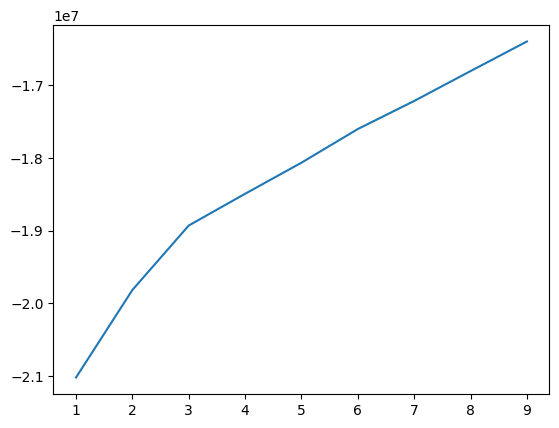

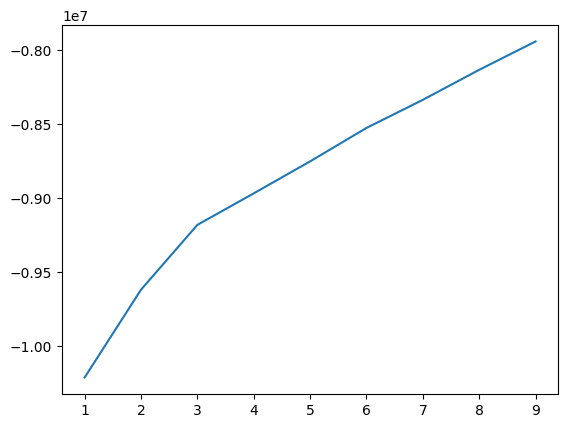

In [10]:
#k-Means를 적용한 훈련 세트의 k별 거리 제곱의 합 시각화

plt.plot([i for i in range(1,10)], train_score_list)
plt.show()

#k-Means를 적용한 평가 세트 k별 거리 제곱의 합시각화

plt.plot([i for i in range(1,10)], test_score_list)
plt.show()

Q2. elbow가 무엇인지, 그리고 위 문제에서 k의 값이 얼마일 때가 elbow인지를 근거를 들어 서술하시오.

[답변] elbow란 그래프가 가장 많이 꺾이는 부분을 의미하는데, 위의 그래프를 보아 k=3일 때가 elbow이다.

#6-3 주성분 분석

1-1. PCA 차원축소를 위한 변수명\
1-2. 반전된 흑백 그림을 얻기 위한 코드

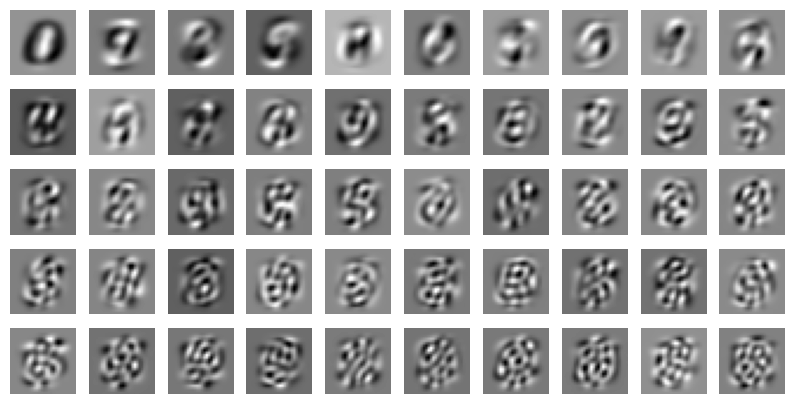

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')

# 이미지 데이터와 레이블 데이터 분리
X = df.drop(columns=['label']).values
y = df['label'].values

# PCA 수행
pca = PCA(n_components = 50)
pca.fit(X)

# 주성분들을 이미지로 표시하는 함수 정의
def draw_df(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j].reshape((28, 28)), cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()

# 주성분들을 이미지로 표시
draw_df(pca.components_)

In [12]:
print(X.shape)

(60000, 784)


2-1. PCA 적용 후의 데이터 shape을 얻기 위한 코드\
2-2. 역변환 후의 데이터 shape을 얻기 위한 코드

In [13]:
import numpy as np
from sklearn.decomposition import PCA

# X 데이터에 대해 PCA 수행
pca = PCA(n_components=50)
pca.fit(X)

# PCA를 적용한 데이터의 shape 확인
X_pca = pca.transform(X)
print("PCA 적용 후의 데이터 shape:", X_pca.shape)

PCA 적용 후의 데이터 shape: (60000, 50)


In [14]:
# 역변환을 수행하여 원래 차원으로 복원한 데이터의 shape 확인
X_inverse = pca.inverse_transform(X_pca)
print("역변환 후의 데이터 shape:", X_inverse.shape)

역변환 후의 데이터 shape: (60000, 784)


3. 원래 차원으로 복원한 이미지를 시각화하는 코드

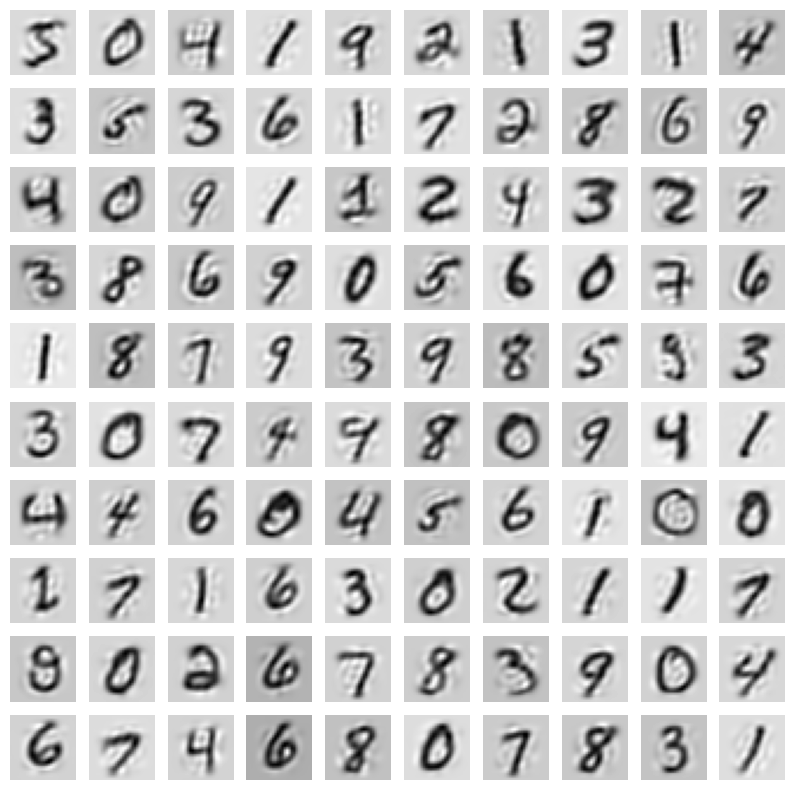

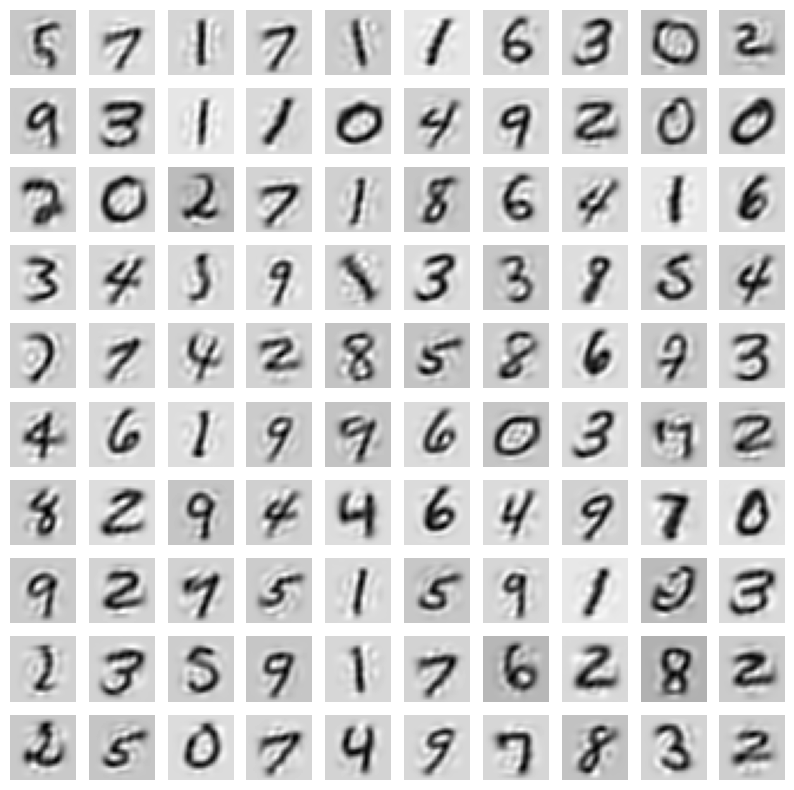

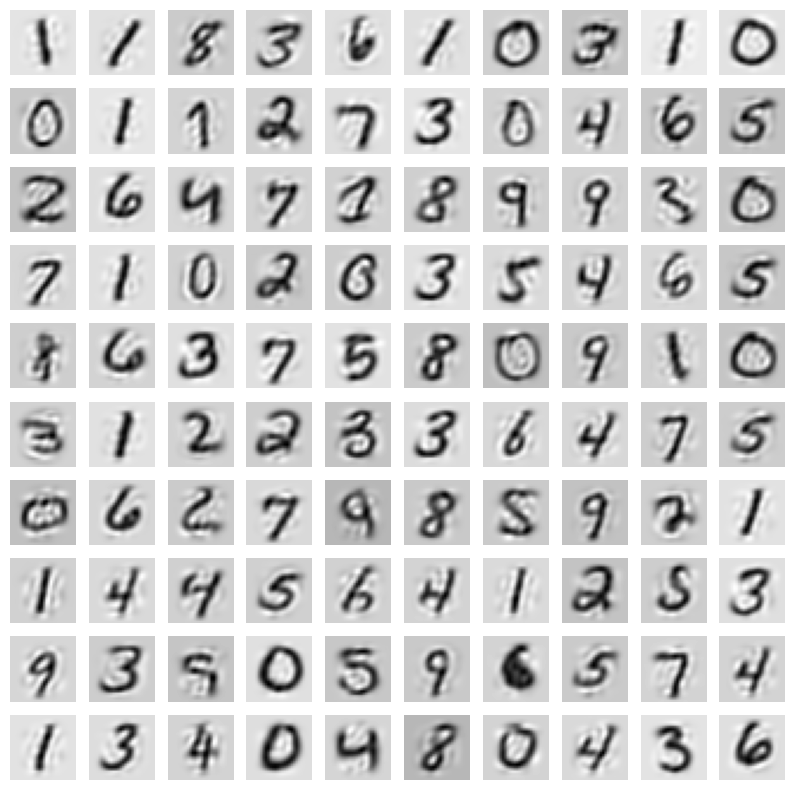

In [15]:
X_reconstruct = X_inverse.reshape(-1, 28, 28)
for start in [0, 100, 200]:
    draw_df(X_reconstruct[start:start+100])
    print("\n")

In [16]:
print(np.sum(pca.explained_variance_ratio_))

0.8246240326353766


4. 설명된 분산 그래프

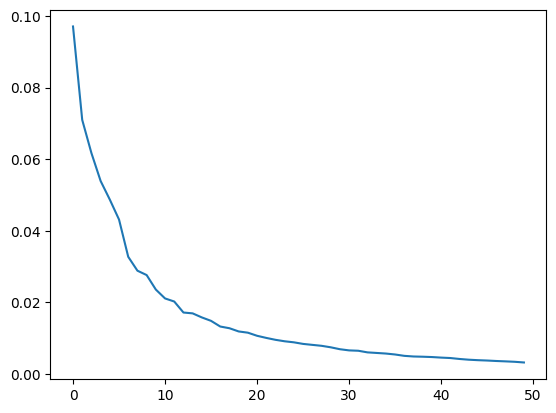

In [17]:
plt.plot(pca.explained_variance_ratio_)

###다른 알고리즘과 함께 사용하기

5-1. Logistic Regression 모델 평가(실행 시간)\
5-2. K-Means 클러스터링의 클러스터 개수

In [18]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# MNIST 데이터 불러오기
df = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')

# 이미지 데이터와 레이블 데이터 분리
X = df.drop(columns=['label']).values
y = df['label'].values

# PCA 적용
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Logistic Regression 모델 생성
lr = LogisticRegression()

# 타겟 레이블 생성
target = y

# Logistic Regression 모델 평가 (PCA 적용 데이터)
scores = cross_validate(lr, X_pca, target)
print("Mean Test Score (Logistic Regression):", np.mean(scores['test_score']))
print("Mean Fit Time (Logistic Regression):", np.mean(scores['fit_time']))

# K-Means 클러스터링
km = KMeans(n_clusters=10, random_state=42)
km.fit(X_pca)
print("\nK-Means Clustering:")
print(np.unique(km.labels_, return_counts=True))

# 각 클러스터의 이미지 시각화
for label in range(10):
    print("\nCluster", label, "Images:")
    indices = np.where(km.labels_ == label)[0][:100]  # 각 클러스터의 처음 100개 이미지 선택
    draw_df(X[indices])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

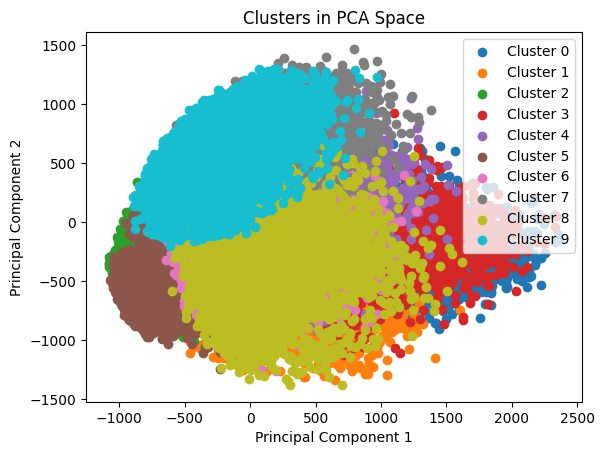

In [19]:
# 각 클러스터를 시각화하는 코드
for label in range(10):
    data = X_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['Cluster {}'.format(i) for i in range(10)])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA Space')
plt.show()